     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.2 MB/s eta 0:00:00


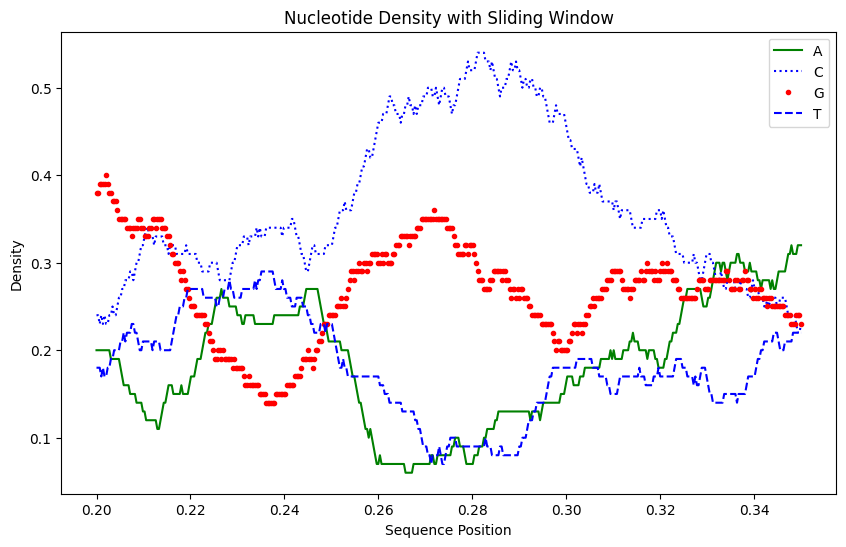

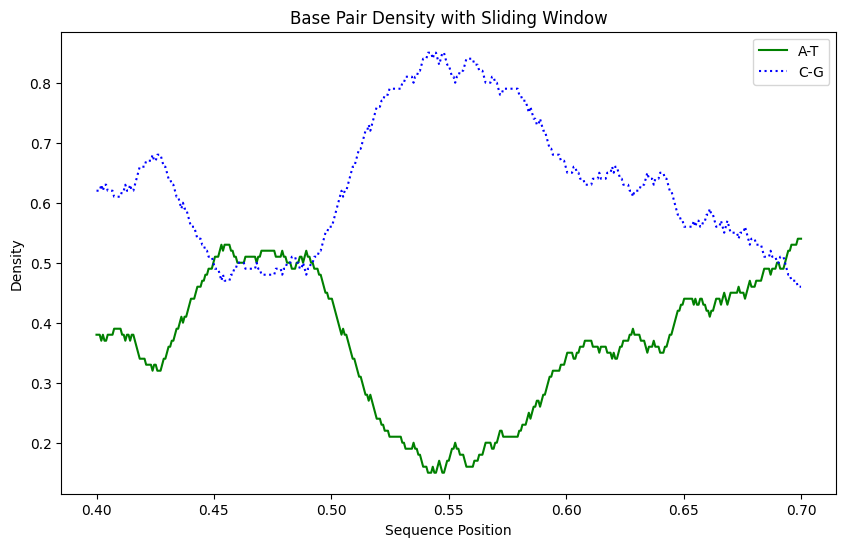

In [ ]:
# Muhammad Fakhri Andika Mutiara
# 5023211056
# Computational Genomics (Q) - Change Point Analysis Assignment

!pip install biopython matplotlib
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

# function to calculate nucleotide density with a sliding window
def nucleotide_density(sequence, window_length):
    total_length = len(sequence)
    densities = {"A": [], "C": [], "G": [], "T": []}

    for i in range(total_length - window_length + 1):
        window = sequence[i:i + window_length]
        for nucleotide in densities:
            count = window.count(nucleotide)
            density = count / window_length
            densities[nucleotide].append(density)

    return densities

# load the FASTA sequence from 'examplefile.fasta'
fasta_file_path = 'examplefile.fasta'
records = list(SeqIO.parse(fasta_file_path, "fasta"))
sequence = str(records[0].seq)

# define sliding window length
window_length = 100

# calculate nucleotide densities
densities = nucleotide_density(sequence, window_length)
densities
# x-values represent sequence positions
x_values = np.linspace(0.2, 0.35, len(densities["A"]))

# plot nucleotide density
plt.figure(figsize=(10, 6))
plt.plot(x_values, densities["A"], 'g-', label='A')
plt.plot(x_values, densities["C"], 'b:', label='C')
plt.plot(x_values, densities["G"], 'r.', label='G')
plt.plot(x_values, densities["T"], 'b--', label='T')
plt.xlabel("Sequence Position")
plt.ylabel("Density")
plt.title("Nucleotide Density with Sliding Window")
plt.legend()
plt.show()

# calculate A-T and C-G densities
at_density = [densities["A"][i] + densities["T"][i] for i in range(len(x_values))]
cg_density = [densities["C"][i] + densities["G"][i] for i in range(len(x_values))]

# x-values represent sequence positions
x_values = np.linspace(0.4, 0.7, len(at_density))

# plot A-T and C-G density
plt.figure(figsize=(10, 6))
plt.plot(x_values, at_density, 'g-', label='A-T')
plt.plot(x_values, cg_density, 'b:', label='C-G')
plt.xlabel("Sequence Position")
plt.ylabel("Density")
plt.title("Base Pair Density with Sliding Window")
plt.legend()
plt.show()

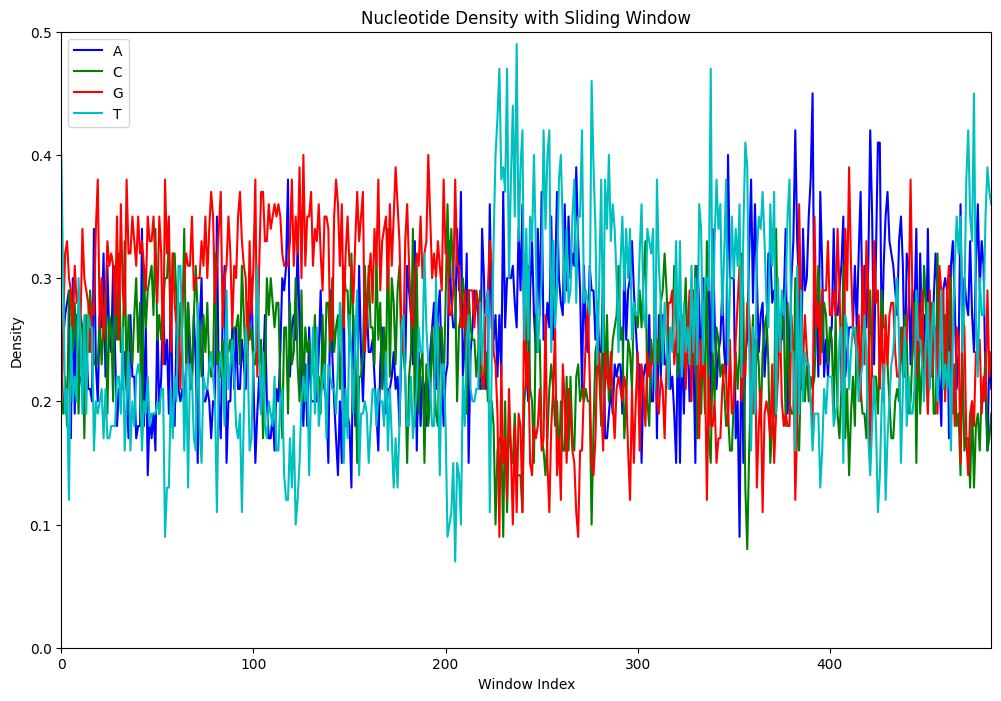

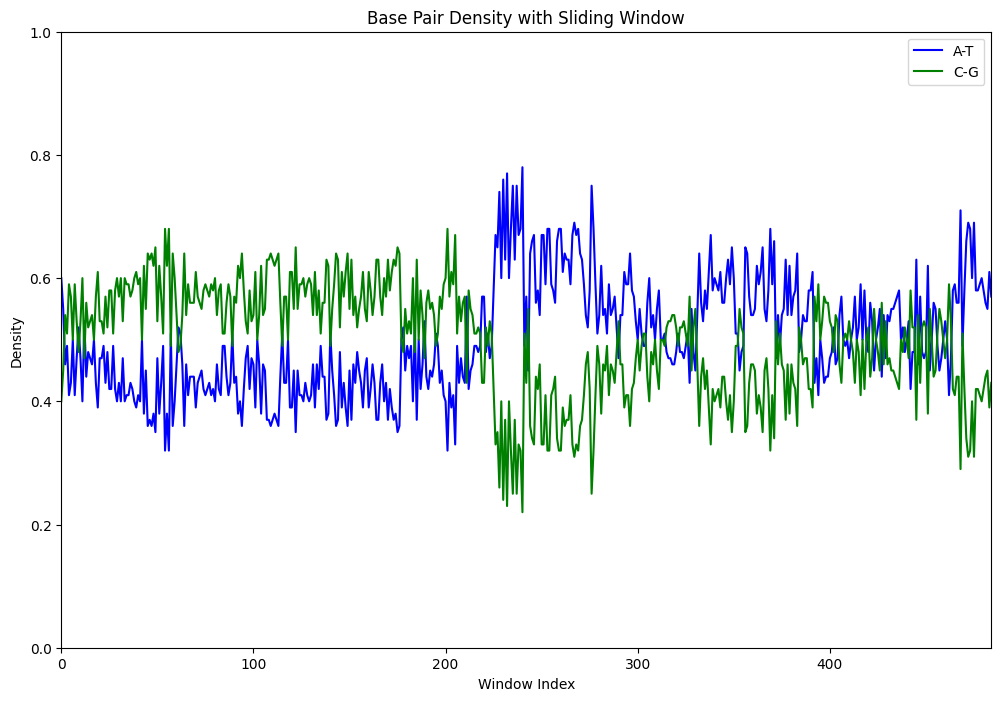

In [ ]:
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

# function to calculate nucleotide density with a sliding window
def nucleotide_density(sequence, window_length):
    densities = {"A": [], "C": [], "G": [], "T": []}
    total_length = len(sequence)

    # moving through the sequence with a sliding window
    for i in range(0, total_length - window_length + 1, window_length):
        window = sequence[i:i + window_length]
        for nucleotide in densities:
            count = window.count(nucleotide)
            density = count / window_length
            densities[nucleotide].append(density)

    return densities

# load the FASTA sequence from 'example_fasta_file.fasta'
fasta_file_path = 'example_fasta_file.fasta'
records = list(SeqIO.parse(fasta_file_path, "fasta"))
sequence = str(records[0].seq)

# define sliding window length
window_length = 100

# calculate nucleotide densities using a sliding window
densities = nucleotide_density(sequence, window_length)

# determine x-values based on the sequence length and sliding window
x_values = np.arange(len(densities["A"]))  # represents the window positions

# nucleotide density plot
plt.figure(figsize=(12, 8))
plt.plot(x_values, densities["A"], 'b-', label='A')
plt.plot(x_values, densities["C"], 'g-', label='C')
plt.plot(x_values, densities["G"], 'r-', label='G')
plt.plot(x_values, densities["T"], 'c-', label='T')
plt.xlabel("Window Index")
plt.ylabel("Density")
plt.ylim(0, 0.5)
plt.xlim(0, len(x_values) - 1)
plt.title("Nucleotide Density with Sliding Window")
plt.legend()
plt.show()

# calculate A-T and C-G densities
at_density = [densities["A"][i] + densities["T"][i] for i in range(len(x_values))]
cg_density = [densities["C"][i] + densities["G"][i] for i in range(len(x_values))]

# A-T and C-G density plot with y-axis range limited to 1
plt.figure(figsize=(12, 8))
plt.plot(x_values, at_density, 'b-', label='A-T')
plt.plot(x_values, cg_density, 'g-', label='C-G')
plt.xlabel("Window Index")
plt.ylabel("Density")
plt.ylim(0, 1)
plt.xlim(0, len(x_values) - 1)
plt.title("Base Pair Density with Sliding Window")
plt.legend()
plt.show()
